In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n=200000
link_id_dict={}

with open("../data/train/20200801.txt", "r") as train_data:
    for _ in range(n):
        line=train_data.readline().split(";;")
        if len(line)>1:
            links=line[1].split(" ")
            for link in links:
                temp=link.split(",")
                temp[0]=temp[0].split(":")

                link_id=int(temp[0][0])
                link_time=float(temp[0][1])
                link_cur_status=int(temp[2])
                link_arr_status=int(temp[3])

                if not link_id in link_id_dict:
                    link_id_dict[link_id]=[[link_time, [link_cur_status, link_arr_status]]]
                else:
                    link_id_dict[link_id].append([link_time, [link_cur_status, link_arr_status]])

In [3]:
del_list=[]

for key, value in link_id_dict.items():
    if len(value)<400:
        del_list.append(key)

for key in del_list:
    del link_id_dict[key]

In [4]:
max_key=-1
max_len=-1

for key, value in link_id_dict.items():
    if len(value)>max_len:
        max_len=len(value)
        max_key=key

max_key, max_len

(420035, 617)

In [5]:
link_id_dict[max_key][:10]

[[14.8114, [1, 1]],
 [5.1315, [1, 0]],
 [1.3995, [1, 0]],
 [24.6857, [1, 1]],
 [10.1647, [1, 1]],
 [103.68, [1, 2]],
 [4.643, [1, 0]],
 [14.1025, [1, 0]],
 [12.3429, [1, 1]],
 [16.7226, [1, 1]]]

In [6]:
x_time=[]
y_cur_status=[]
y_arr_status=[]

for entry in link_id_dict[max_key]:
    x_time.append(entry[0])
    y_cur_status.append(entry[1][0])
    y_arr_status.append(entry[1][1])

x_time=np.array(x_time)
x_time=x_time.reshape(-1, 1)
;

''

In [7]:
max(y_cur_status)

4

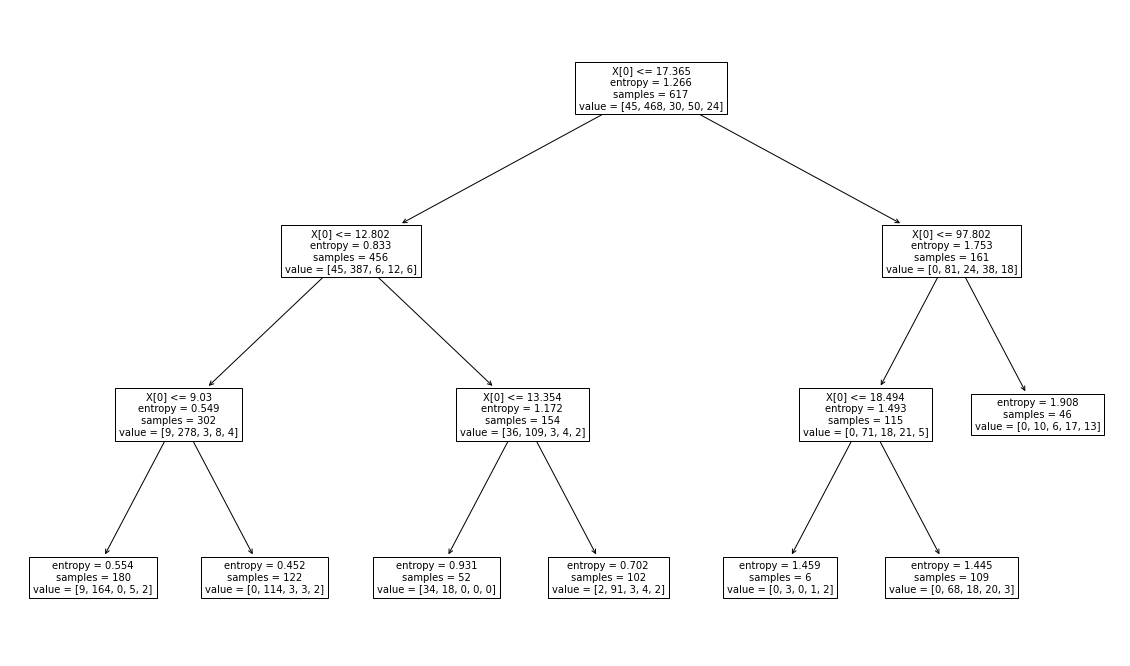

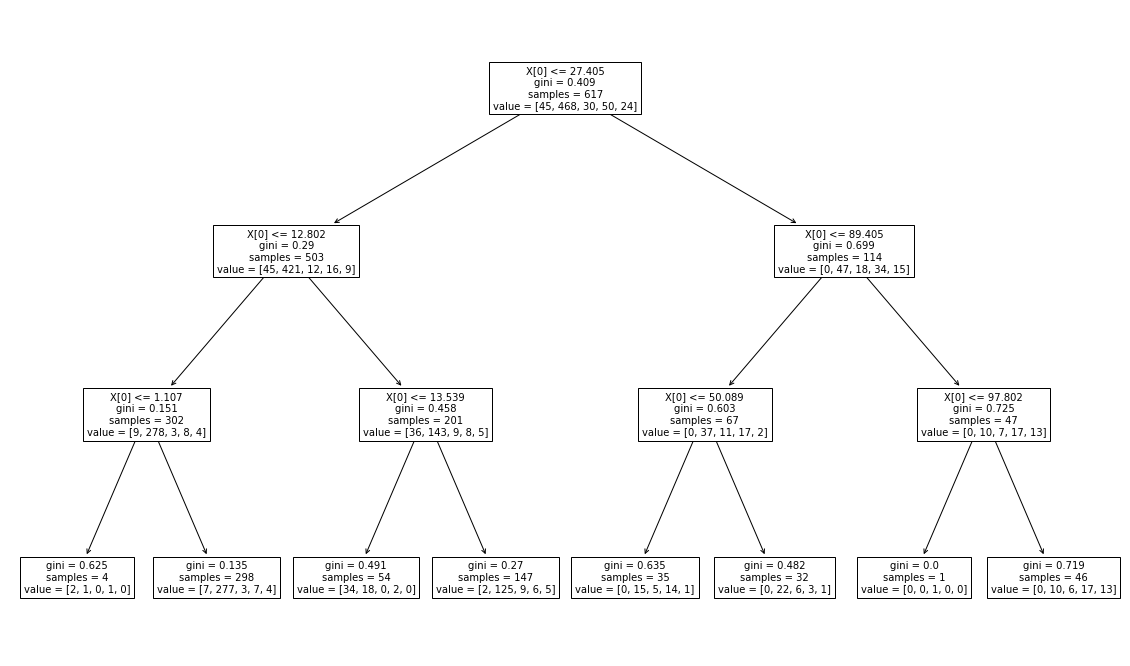

In [13]:
from sklearn import tree

clf=tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf=clf.fit(x_time, y_cur_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

clf=tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
clf=clf.fit(x_time, y_cur_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

plt.show()

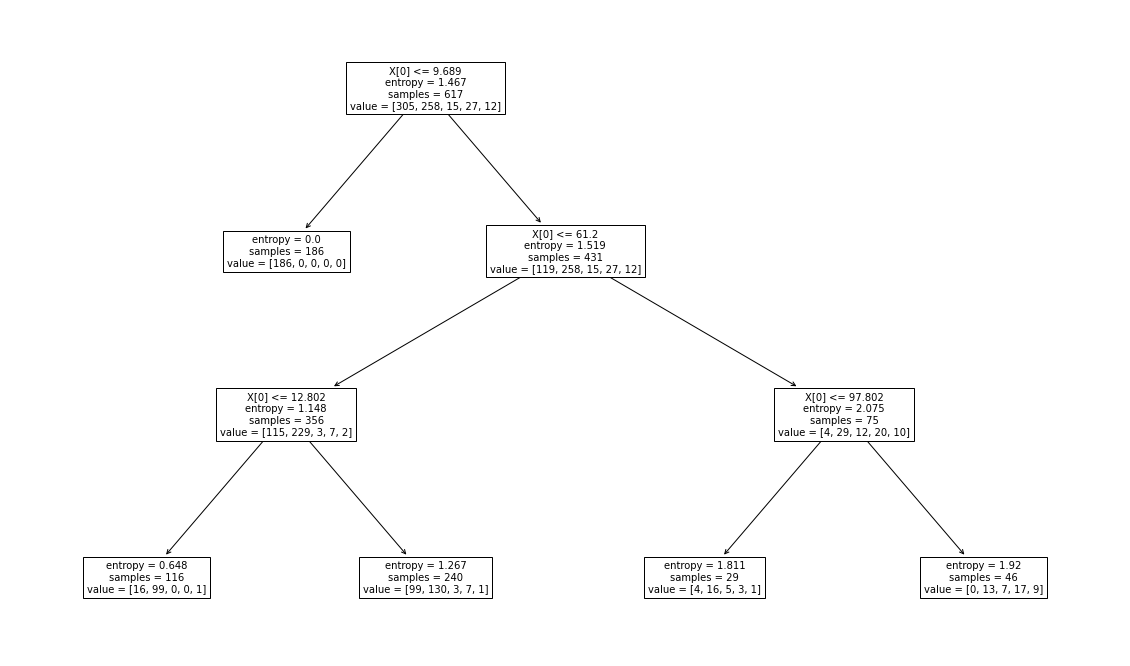

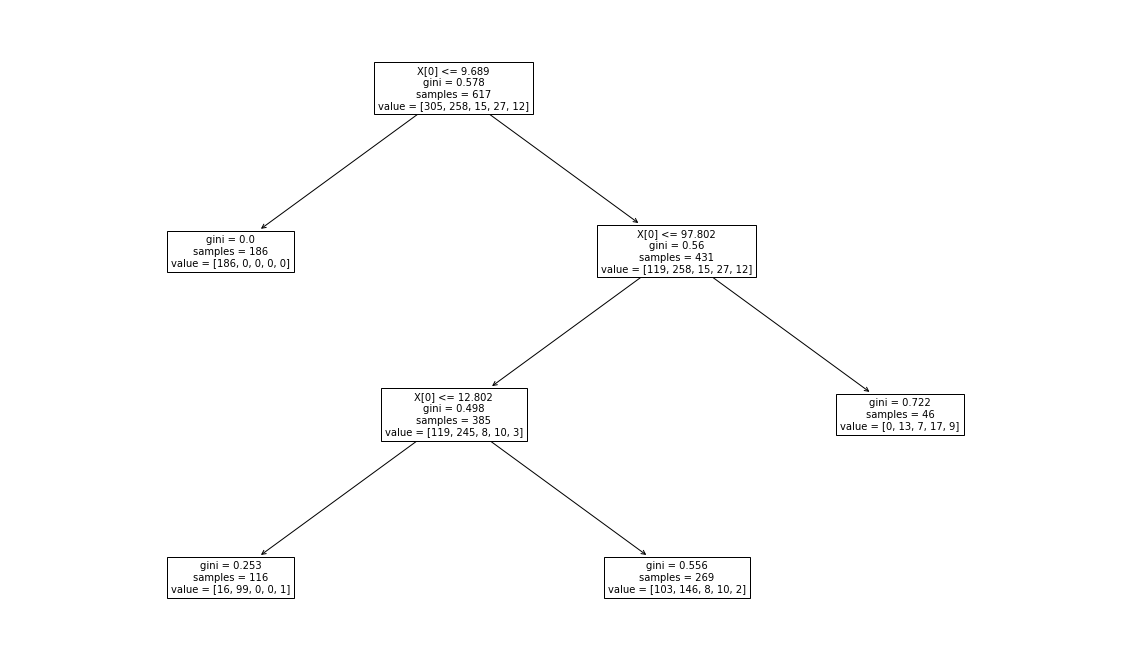

In [14]:
clf=tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf=clf.fit(x_time, y_arr_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

clf=tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
clf=clf.fit(x_time, y_arr_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

plt.show()